In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import yroots as yr
import Optimal_QR as O_QR

In [2]:
data = np.load('chebsuite_result.pkl',allow_pickle=True)
qrt = pd.DataFrame(data['qrt'])
svd = pd.DataFrame(data['svd'])
tvb = pd.DataFrame(data['tvb'])

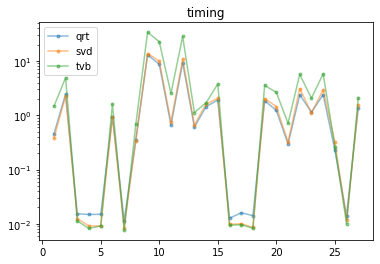

In [3]:
plt.semilogy(qrt['timing'],marker='.',c='C0',label='qrt',alpha=.5)
plt.semilogy(svd['timing'],marker='.',c='C1',label='svd',alpha=.5)
plt.semilogy(tvb['timing'],marker='.',c='C2',label='tvb',alpha=.5)
plt.title('timing')
plt.legend()

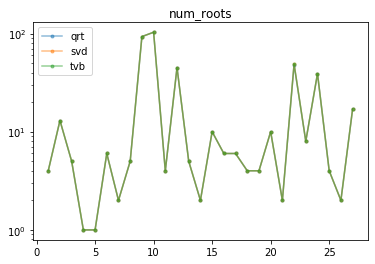

In [4]:
plt.semilogy(qrt['num_roots'],marker='.',c='C0',label='qrt',alpha=.5)
plt.semilogy(svd['num_roots'],marker='.',c='C1',label='svd',alpha=.5)
plt.semilogy(tvb['num_roots'],marker='.',c='C2',label='tvb',alpha=.5)
plt.title('num_roots')
plt.legend()

In [5]:
qrt

,max_residuals,avg_residuals,timing,norms,num_roots,cond,backcond,cond_eig,gradient_info,intervals
1,4.848373e-10,"(2.7718272122001508e-11, -1.1467340271797966e-10)",0.450646,"[[1.3231260531654243e-10, 2.633704365706535e-1...",4,960.933244,960.933244,"[1.3714199955457989, 1.3714199955457989, 1.351...","[[[(0.7443798277938716+0j), (0.759717969234864...",121
2,6.502504e-12,"(6.579411049825089e-14, 7.176414316557453e-13)",2.471110,"[[-2.4223401062783978e-12, 3.5160763189878708e...",13,31435.675702,31435.675702,"[1.4897992089236598, 1.4897992089236598, 1.345...","[[[(-0.0006819280488106572+0j), (-0.0006739653...",853
3,9.004841e-15,"(5.302344934648984e-16, 1.7149909964375709e-16)",0.015324,"[[-8.977540932875172e-14, -3.1787072973799013e...",5,2.000000,2.000000,"[1.8033394178543292, 1.8033394178543292, 19.36...","[[[(-1.6947283659654033+0j), (1.30320917416280...",1
4,0.000000e+00,"(0.0, 0.0)",0.014881,"[[0.0, 0.0]]",1,0.000000,0.000000,"[[1.0000000000000004], [1.0000000000000004]]","[[[(1+0j), (-1+0j)], [(1+0j), (1+0j)]]]",1
5,8.326673e-17,"(-8.326672684688674e-17, 0.0)",0.014960,"[[1.1102230246251565e-16, 4.996003610813204e-16]]",1,0.000000,0.000000,"[[2.0810003364413405], [2.0810003364413405]]","[[[(0.5+0j), (1+0j)], [(-2.0999999999999996+0j...",1
6,4.853077e-11,"(1.2703159065232686e-11, -2.1464311809419694e-14)",0.945506,"[[1.8851586958135158e-13, 1.1057821325266559e-...",6,441.243083,441.243083,"[1.3991160484595604, 1.3991160484595604, 1.306...","[[[(0.004964185232917819+0j), (-0.002994329549...",352
7,4.440892e-16,"(-9.573657170695708e-21, 3.3306690738754696e-16)",0.011399,"[[5.14374448773994e-19, 5.8494875609937935e-15...",2,3.236068,3.236068,"[6.0290257989906495, 6.0290257989906495, 6.029...","[[[(0.9999999999999998+0j), 0j], [(-1.99979999...",1
8,6.435769e-11,"(-1.0088523145960848e-11, 3.050814160258956e-11)",0.353661,"[[-4.685696275430473e-13, -6.75670630556624e-1...",5,98135.718633,98135.718633,"[1.391390616942378, 1.391390616942378, 1.39031...","[[[(-0.030308661850040178+0j), (-0.00303086616...",148
9,7.109727e-09,"(5.462565981740371e-11, 1.67992917910248e-10)",12.944590,"[[7.268408097615975e-12, 5.157985150106015e-12...",93,98940.796146,98940.796146,"[1.403900391733461, 1.403900391733461, 1.41523...","[[[(-0.0007744952070503503+0j), (-0.0009911346...",4297
10,6.266171e-08,"(-4.1564726862607187e-10, -3.361160536676598e-11)",8.724391,"[[1.5190515512131242e-09, 8.748557434046234e-1...",103,99971.787743,99971.787743,"[1.3710260419448508, 1.3710260419448508, 1.389...","[[[(0.04282895516123239+0j), (0.00723295527161...",3406


KeyError: 'residuals'

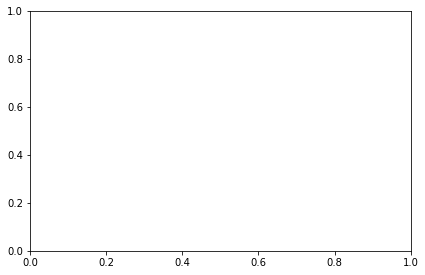

In [6]:
plt.figure(figsize=(15,15))
for i,attr in zip(range(6),['residuals','norms','backcond','cond']):
    plt.subplot(3,2,i+1)
    plt.semilogy(qrt[attr],marker='.',c='C0',label='qrt'+attr,alpha=.5)
    plt.semilogy(svd[attr],marker='.',c='C1',label='svd'+attr,alpha=.5)
    plt.semilogy(tvb[attr],marker='.',c='C2',label='tvb'+attr,alpha=.5)
    plt.title(attr)
    plt.legend()

In [ ]:
np.argmax(qrt['residuals'])

In [ ]:
qrt['cond_eig']